Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

- Сгенерируйте из него выборку объёма 1000.
- Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

В этом конкрентном сценарии было выбрано [распределение Wald](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wald.html#scipy.stats.wald).


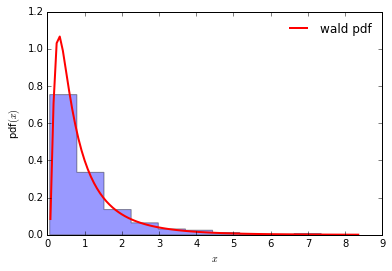

In [2]:
# для того чтобы график был отрисован здесь а не в отдельном окне
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wald

# конфигурация графика
fig, ax = plt.subplots(1, 1)
# нахождение интервала в котором сконцетрированы значения случайной переменной
# это линейное рассечение интервала нужно для построения графика плотности
x = np.linspace(wald.ppf(0.001), wald.ppf(0.999), 100)
# график теоретической плотности распределения 
ax.plot(x, wald.pdf(x), 'r-', lw=2, label='wald pdf')
# выборка размера 1000 
r = wald.rvs(size=1000)
# построение гисторграммы на основе этой выборки
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.4)
# вывод графика на экран
ax.legend(loc='best', frameon=False)
plt.ylabel('pdf$(x)$')
plt.xlabel('$x$')
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок.

- Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

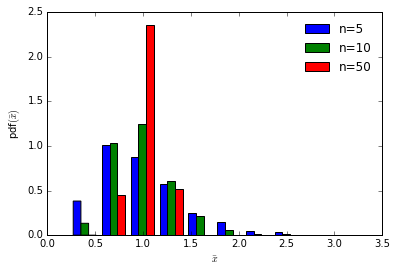

In [5]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import wald

# параметры - размер выборки
ns = [5, 10, 50]
# зафиксируем случайную переменную
rv = wald()
# функция которая выдаст генератор списков для выборочных средних для разных n
def sample_means(ns):
    for n in ns:
        # вернет list с выборочными средними
        yield [np.sum(rv.rvs(size=n))/float(n) for _ in xrange(0, 1000)]

fig, ax = plt.subplots(1, 1)
# подписи к графикам
labels = ['n='+str(n) for n in ns]
rv_sample_means = list(sample_means(ns))
# обратите внимание что используется тип histtype='bar' который позволяет
# показать гистограммы вместе на одной катринке
ax.hist(rv_sample_means, normed=True, histtype='bar', label=labels)
ax.legend(loc='best', frameon=False)
plt.ylabel(r'pdf$(\bar{x})$')
plt.xlabel(r'$\bar{x}$')
plt.show()

Посмотреть описание этого случайного распределения можно например на [The Wald Distribution](http://www.math.uah.edu/stat/special/Wald.html).
Хотя там дан пример для Basic Wald distribution, где λ∈(0,∞), можно заметить что в [документации Scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wald.html#scipy.stats.wald) что этот параметр фиксирован на λ=1.
Что дает нам Standard Wald distribution.

Из секции 6 первого документа следует что для U~Wald(λ=1):

+ E(U)=1
+ var(U)=1

Вернемся к заданию.

- Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

На странице 10 последнего раздаточного материала дано приближение выборочного среднего нормальным распередением.
Для расперделения Wald это будет N(1, 1/n).
Давайте сраним эмпирически на сколько это похоже на правду.

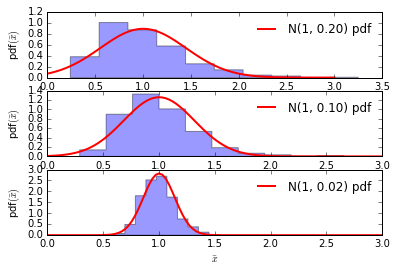

In [21]:
from scipy.stats import norm

fig, axs = plt.subplots(3, 1)

# на этом этапе мы уже знаем где будет находится большая часть случайных переменных
# так что соотв интервал графика можно просто зафиксировать.
x = np.linspace(0, 3, 100)

for i in xrange(0,3):
    ax = axs[i]
    # нормальное распределение которое должно аппроксимировать искомую плотность 
    # согласно ЦПТ. scale - это не дисперсия, а квадратный корень из дисперсии.
    disp = 1./float(ns[i])
    nrv = norm(loc=1, scale=np.sqrt(disp))
    # график теоретической плотности распределения 
    ax.plot(x, nrv.pdf(x), 'r-', lw=2, label='N(%d, %.2f) pdf' % (1, disp))
    # выборка из предыдущей части задания 
    r = rv_sample_means[i]
    # построение гисторграммы на основе этой выборки
    ax.hist(r, normed=True, histtype='stepfilled', alpha=0.4)
    # вывод графика на экран
    ax.legend(loc='best', frameon=False)
    ax.set_ylabel(r'pdf$(\bar{x})$')
    ax.set_xlabel(r'$\bar{x}$')

plt.show()

Как видно из графиков, последний наиболее похож на нормальное распередение.
Как мы знаем из лекций при росте N (последнее N=50) распеределение выборочных средних приближается к нормальному с соотв параметрами.
Действильное на это похоже.